In [1]:
import pandas as pd

df = pd.read_csv("../data/kb_train.csv")

#### View dataframe structure and basic statistics

In [2]:
df

,text,label,sentiment_sum,non_zero_count,num_tokens,avg_nonzero,ratio
0,Bromwell High is a cartoon comedy. It ran at t...,1,1.42860,23,140,0.062113,0.164286
1,Homelessness (or Houselessness as George Carli...,1,-4.30440,47,446,-0.091583,0.105381
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,1.48870,26,148,0.057258,0.175676
3,This is easily the most underrated film inn th...,1,-1.93700,23,124,-0.084217,0.185484
4,This is not the typical Mel Brooks film. It wa...,1,1.90780,19,120,0.100411,0.158333
...,...,...,...,...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",0,0.32370,40,285,0.008092,0.140351
24996,This is the kind of movie that my enemies cont...,0,1.00472,23,160,0.043683,0.143750
24997,I saw 'Descent' last night at the Stockholm Fi...,0,-4.25376,57,298,-0.074627,0.191275
24998,Some films that you pick up for a pound turn o...,0,-2.27774,41,239,-0.055555,0.171548


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            25000 non-null  object 
 1   label           25000 non-null  int64  
 2   sentiment_sum   25000 non-null  float64
 3   non_zero_count  25000 non-null  int64  
 4   num_tokens      25000 non-null  int64  
 5   avg_nonzero     25000 non-null  float64
 6   ratio           25000 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe()

,label,sentiment_sum,non_zero_count,num_tokens,avg_nonzero,ratio
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.50000,-0.737594,38.727560,238.825080,-0.014716,0.165331
std,0.50001,3.324067,28.581519,177.447553,0.098106,0.036657
min,0.00000,-25.510200,1.000000,10.000000,-0.666700,0.021739
25%,0.00000,-2.504625,21.000000,130.000000,-0.076531,0.141064
50%,0.50000,-0.556300,30.000000,178.000000,-0.018424,0.163414
75%,1.00000,1.222050,47.000000,291.000000,0.042652,0.187500
max,1.00000,29.581040,326.000000,2502.000000,0.700000,0.466667


#### Review statistics by label

In [5]:
# define functions for plotting
# written by ChatGPT

import matplotlib.pyplot as plt

def plot_histogram_metric(df, metric, label_col='label', bins=30):
    """
    Disegna due istogrammi sovrapposti di 'metric' per le due classi indicate in label_col (0 e 1).
    df: DataFrame con almeno le colonne metric e label_col.
    metric: nome della colonna numerica da visualizzare.
    label_col: nome della colonna con valori 0/1 (o equivalenti).
    bins: numero di bin per l'istogramma.
    """
    # Estrai valori per ciascuna classe
    vals_pos = df[df[label_col] == 1][metric].dropna()
    vals_neg = df[df[label_col] == 0][metric].dropna()
    plt.figure()
    plt.hist(vals_pos, bins=bins, alpha=0.6, label='Positive')
    plt.hist(vals_neg, bins=bins, alpha=0.6, label='Negative')
    plt.xlabel(metric)
    plt.ylabel('Count')
    plt.title(f'Distribution of {metric} by label')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def plot_boxplot_metric(df, metric, label_col='label'):
    """
    Disegna un boxplot di 'metric' separato per le due classi in label_col.
    df: DataFrame con le colonne metric e label_col.
    metric: nome della colonna numerica da visualizzare.
    label_col: nome della colonna con valori 0/1.
    """
    # Prepara due liste di valori
    vals_neg = df[df[label_col] == 0][metric].dropna()
    vals_pos = df[df[label_col] == 1][metric].dropna()
    data = [vals_neg, vals_pos]
    plt.figure()
    plt.boxplot(data, labels=['Negative', 'Positive'])
    plt.ylabel(metric)
    plt.title(f'Boxplot of {metric} by label')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def plot_scatter_metrics(df, metric_x, metric_y, label_col='label'):
    """
    Disegna scatter plot metric_x vs metric_y colorando i punti in base a label_col.
    df: DataFrame con colonne metric_x, metric_y, label_col.
    metric_x, metric_y: nomi delle colonne numeriche da plottare sugli assi.
    label_col: nome della colonna con valori 0/1.
    """
    x = df[metric_x]
    y = df[metric_y]
    labels = df[label_col]
    plt.figure()
    # Scegli colori: 1 -> blu, 0 -> rosso
    colors = labels.map({0: 'red', 1: 'blue'})
    plt.scatter(x, y, c=colors, alpha=0.3, edgecolors='none')
    plt.xlabel(metric_x)
    plt.ylabel(metric_y)
    plt.title(f'Scatter: {metric_x} vs {metric_y}')
    # Aggiungi legenda manuale
    # Crea patch per legenda
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Negative')
    blue_patch = mpatches.Patch(color='blue', label='Positive')
    plt.legend(handles=[blue_patch, red_patch])
    plt.grid(linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
df.groupby("label")["sentiment_sum"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,12500.0,-2.206958,2.989252,-25.5102,-3.68095,-1.815790,-0.31239,19.53868
1,12500.0,0.731770,2.974171,-20.4924,-0.83085,0.754525,2.33620,29.58104


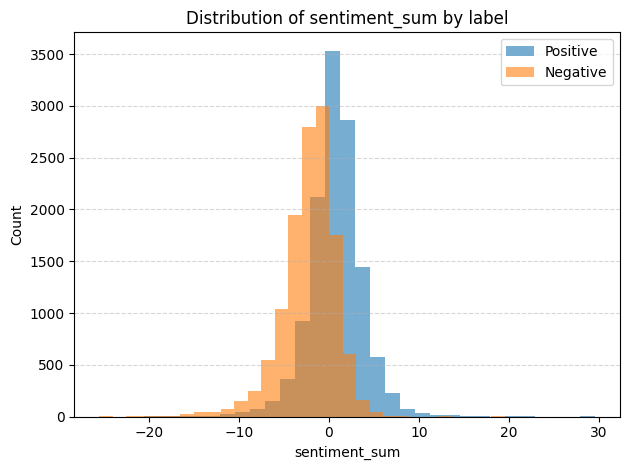

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13864\2529653551.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Negative', 'Positive'])


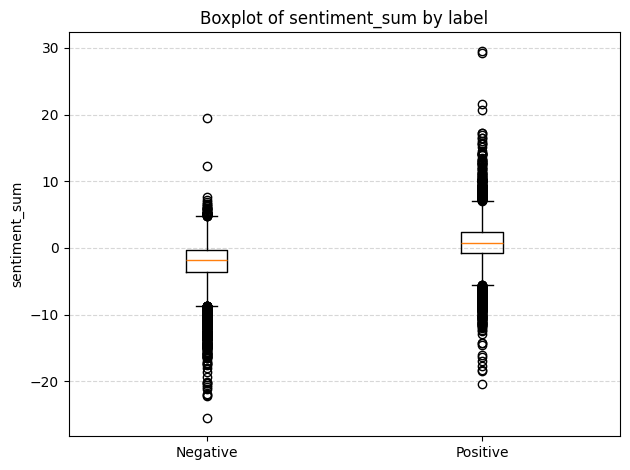

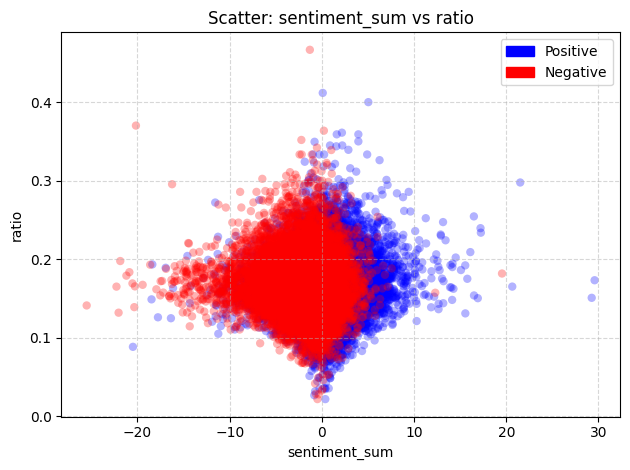

In [7]:
plot_histogram_metric(df, "sentiment_sum")
plot_boxplot_metric(df, "sentiment_sum")
plot_scatter_metrics(df, "sentiment_sum", "ratio")

In [8]:
df.groupby("label")["non_zero_count"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,12500.0,38.98104,28.006640,1.0,21.0,30.0,47.0,265.0
1,12500.0,38.47408,29.143976,1.0,20.0,29.0,47.0,326.0


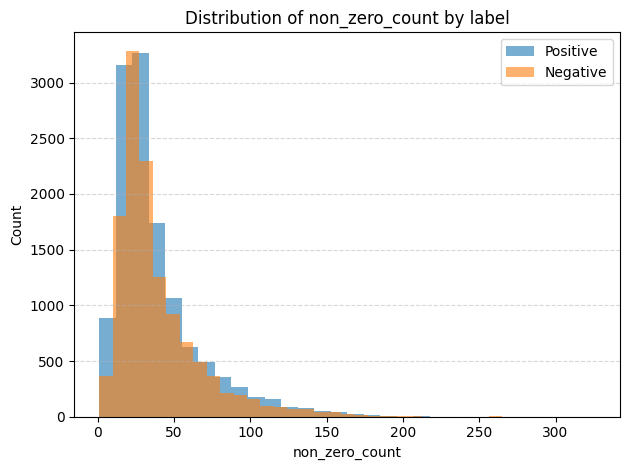

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13864\2529653551.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Negative', 'Positive'])


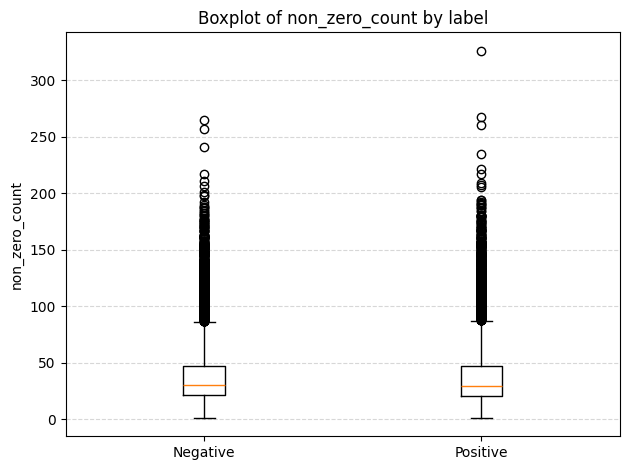

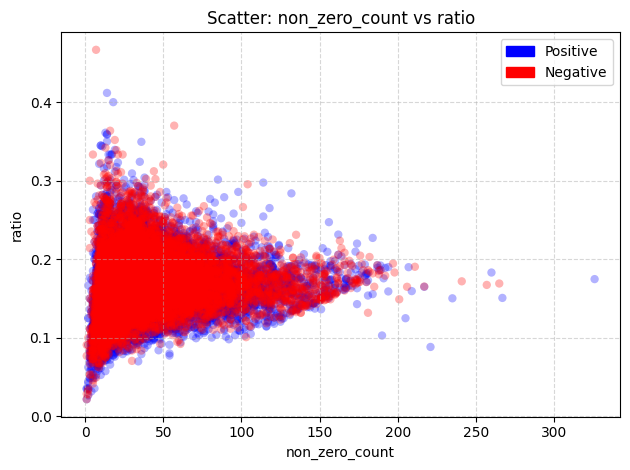

In [9]:
plot_histogram_metric(df, "non_zero_count")
plot_boxplot_metric(df, "non_zero_count")
plot_scatter_metrics(df, "non_zero_count", "ratio")

In [10]:
df.groupby("label")["num_tokens"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,12500.0,236.22088,170.524575,10.0,131.0,178.0,284.0,1567.0
1,12500.0,241.42928,184.080395,12.0,128.0,177.5,297.0,2502.0


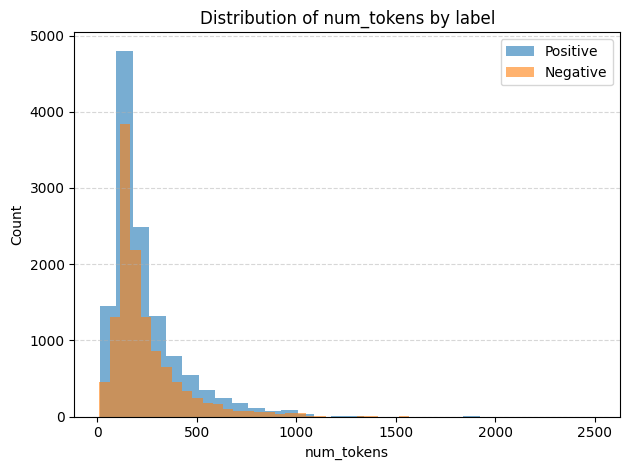

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13864\2529653551.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Negative', 'Positive'])


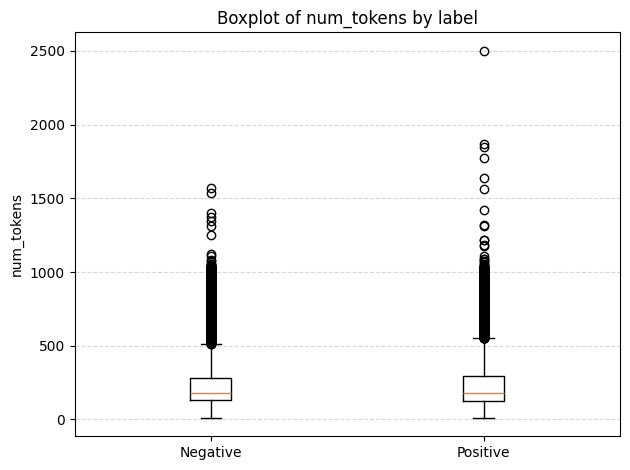

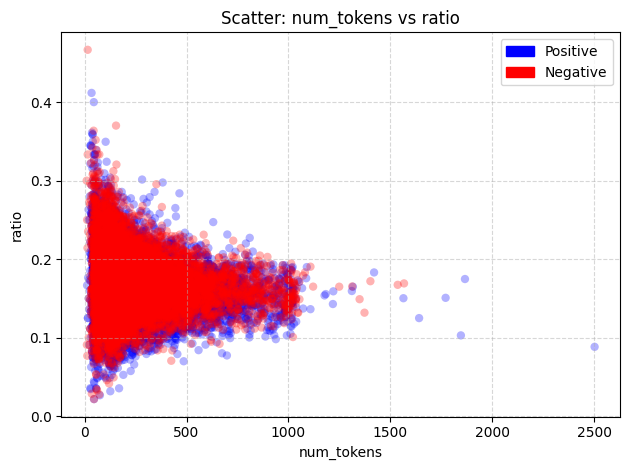

In [11]:
plot_histogram_metric(df, "num_tokens")
plot_boxplot_metric(df, "num_tokens")
plot_scatter_metrics(df, "num_tokens", "ratio")

In [12]:
df.groupby("label")["ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,12500.0,0.167742,0.035610,0.021739,0.144267,0.165877,0.188904,0.466667
1,12500.0,0.162919,0.037523,0.021739,0.137931,0.160976,0.185484,0.411765


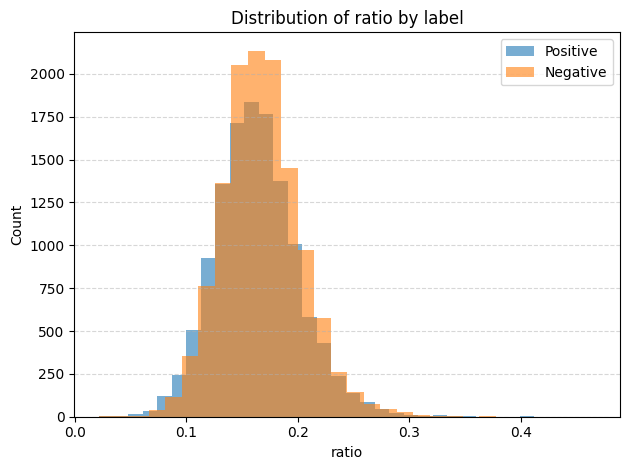

C:\Users\pasqu\AppData\Local\Temp\ipykernel_13864\2529653551.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Negative', 'Positive'])


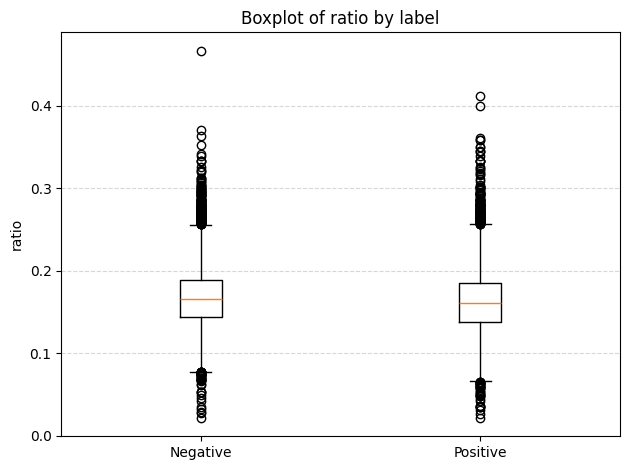

In [13]:
plot_histogram_metric(df, "ratio")
plot_boxplot_metric(df, "ratio")